# Survival Analysis : Implementation

In [2]:
!pip install lifelines

     |████████████████████████████████| 325 kB 212 kB/s eta 0:00:01
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47990 sha256=632d974806dd3ec3c95016f591aa48b679be0931be29a6ee3ca1d56961c5da3a
  Stored in directory: /home/akshat/.cache/pip/wheels/ef/32/31/0e87227cd0ca1d99ad51fbe4b54c6fa02afccf7e483d045e04
Successfully built autograd


In [1]:
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-0.0.2-py2.py3-none-any.whl size=9629 sha256=5d08c8727cd2e0d1991487fc65c197052cbbf2b5ff41aa2567a3fe69ca848e2a
  Stored in directory: /home/akshat/.cache/pip/wheels/bb/35/a9/b66dcda859b25d96509b26b47878164067f49ac1feb2a555ac
Successfully built ppscore


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


### Example with a fictitious data

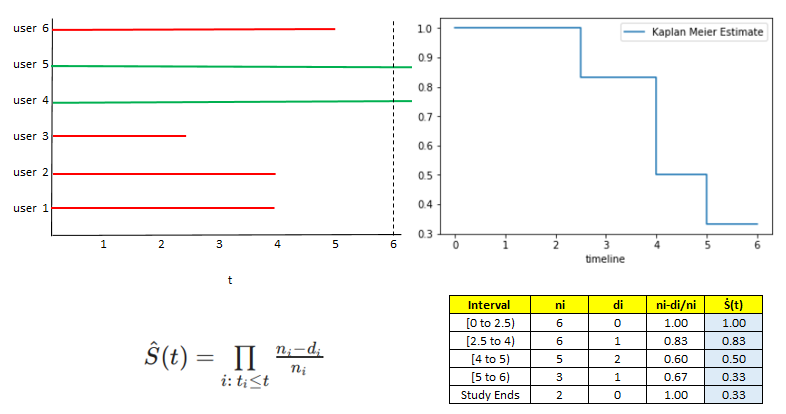

In [3]:
from IPython.display import Image
Image("/home/akshat/Desktop/data.png")

 in case of user 4 and user 5, we don’t know at what time the event will occur, but still we are using that data to estimate the probability of survival. If we choose not to include the censored data, then it is highly likely that our estimates would be highly biased and under-estimated. The inclusion of censored data to calculate the estimates, makes the Survival Analysis very powerful

ni is deﬁned as the population at risk at time just prior to time ti; and di is defined as number of events occurred at time ti.

<lifelines.KaplanMeierFitter:"Kaplan Meier Estimate", fitted with 6 total observations, 2 right-censored observations>


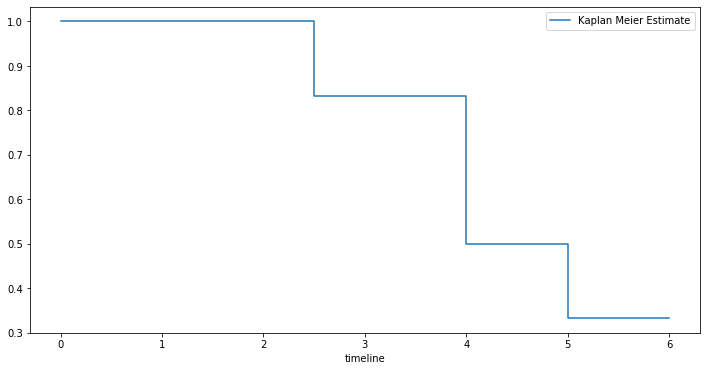

In [5]:
from lifelines import KaplanMeierFitter

## Example Data 
durations = [5,6,6,2.5,4,4]
event_observed = [1, 0, 0, 1, 1, 1]

## create an kmf object
kmf = KaplanMeierFitter() 


## Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.
print(kmf)

<b>Right censoring</b> – a data point is above a certain value but it is unknown by how much. ... The observed value is the minimum of the censoring and failure times; subjects whose <b>failure time is greater than their censoring time</b> are right-censored.

## Real World Example 

### We will be using Telco Customer Churn data from Kaggle
https://www.kaggle.com/blastchar/telco-customer-churn/

In [33]:
##  create a dataframe
df = pd.read_csv("/home/akshat/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv") 

## Explanation of Dataset

<b>customerID:</b> Customer ID
<br>
<b>gender:</b> Whether the customer is a male or a female
<br>
<b>SeniorCitizen:</b> Whether the customer is a senior citizen or not (1, 0)
<br>
<b>Partner:</b> Whether the customer has a partner or not (Yes, No)
<br>
<b>Dependents:</b> Whether the customer has dependents or not (Yes, No)
<br>
<b>tenure:</b> Number of months the customer has stayed with the company
<br>
<b>PhoneService:</b> Whether the customer has a phone service or not (Yes, No)
<br>
<b>MultipleLines:</b> Whether the customer has multiple lines or not (Yes, No, No phone service)
<br>
<b>InternetService:</b> Customer’s internet service provider (DSL, Fiber optic, No)
<br>
<b>OnlineSecurity:</b> Whether the customer has online security or not (Yes, No, No internet service)
<br>
<b>OnlineBackup:</b> Whether the customer has online backup or not (Yes, No, No internet service)
<br>
<b>DeviceProtection:</b> Whether the customer has device protection or not (Yes, No, No internet service)
<br>
<b>TechSupport:</b> Whether the customer has tech support or not (Yes, No, No internet service)
<br>
<b>StreamingTV:</b> Whether the customer has streaming TV or not (Yes, No, No internet service)
<br>
<b>StreamingMovies:</b> Whether the customer has streaming movies or not (Yes, No, No internet service)
<br>
<b>Contract:</b> The contract term of the customer (Month-to-month, One year, Two year)
<br>
<b>PaperlessBilling:</b> Whether the customer has paperless billing or not (Yes, No)
<br>
<b>PaymentMethod:</b> The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
<br>
<b>MonthlyCharges:</b> The amount charged to the customer monthly
<br>
<b>TotalCharges:</b> The total amount charged to the customer
<br>
<b>Churn:</b> Whether the customer churned or not (Yes or No)

In [34]:
## Have a first look at the data
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
## Data Types and Missing Values in Columns
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
## Convert TotalCharges to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

## Replace yes and No in the Churn column to 1 and 0. 1 for the event and 0 for the censured data.
df['Churn']=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [37]:
## after converting the column TotalCharges to numeric
df.info()  ## Column TotalCharges is having missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
## Impute the null value with the median value

df.TotalCharges.fillna(value=df['TotalCharges'].median(),inplace=True)

ways of filling missing values - https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

In [39]:
## Create a list of Categorical Columns
cat_cols= [i  for i in df.columns if df[i].dtype==object]
cat_cols.remove('customerID')  ## customerID has been removed because it is unique for all the rows.

In [40]:
## lets have a look at the categories and their distribution in all the categorical columns.

for i in cat_cols:
    print('Column Name: ',i)
    print(df[i].value_counts())
    print('-----------------------------')

Column Name:  gender
Male      3555
Female    3488
Name: gender, dtype: int64
-----------------------------
Column Name:  Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
-----------------------------
Column Name:  Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
-----------------------------
Column Name:  PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
-----------------------------
Column Name:  MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-----------------------------
Column Name:  InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-----------------------------
Column Name:  OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
-----------------------------
Column Name:  OnlineBackup
No                     3088
Yes     

# Predictive Power Score

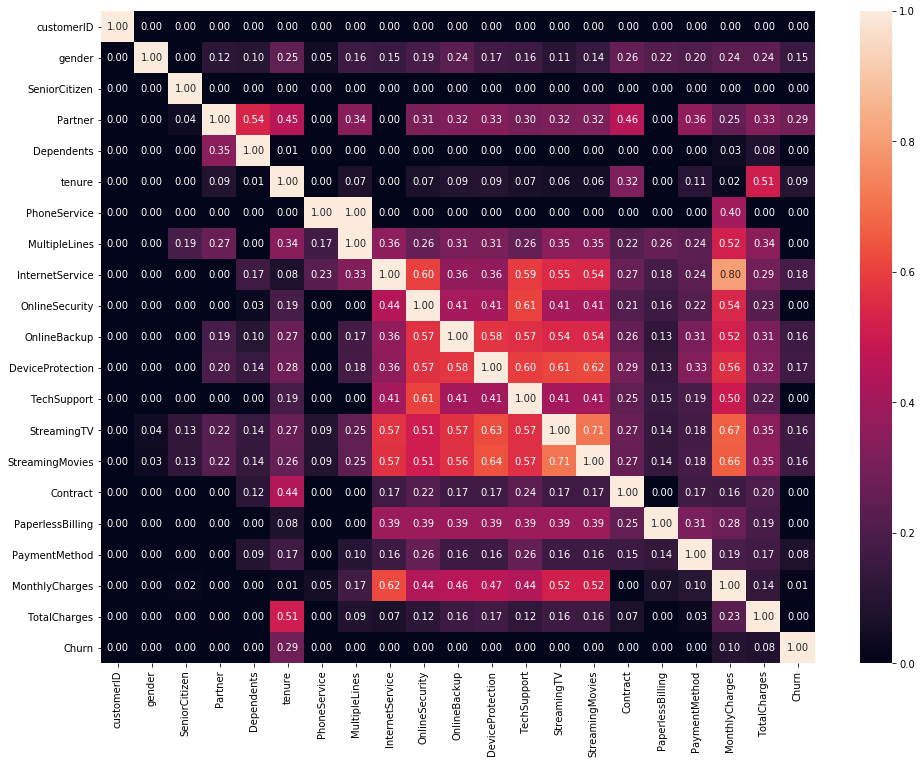

In [41]:
import ppscore as pps
plt.figure(figsize=(16,12))
sns.heatmap(pps.matrix(df),annot=True,fmt=".2f")

# Corelation Matrix

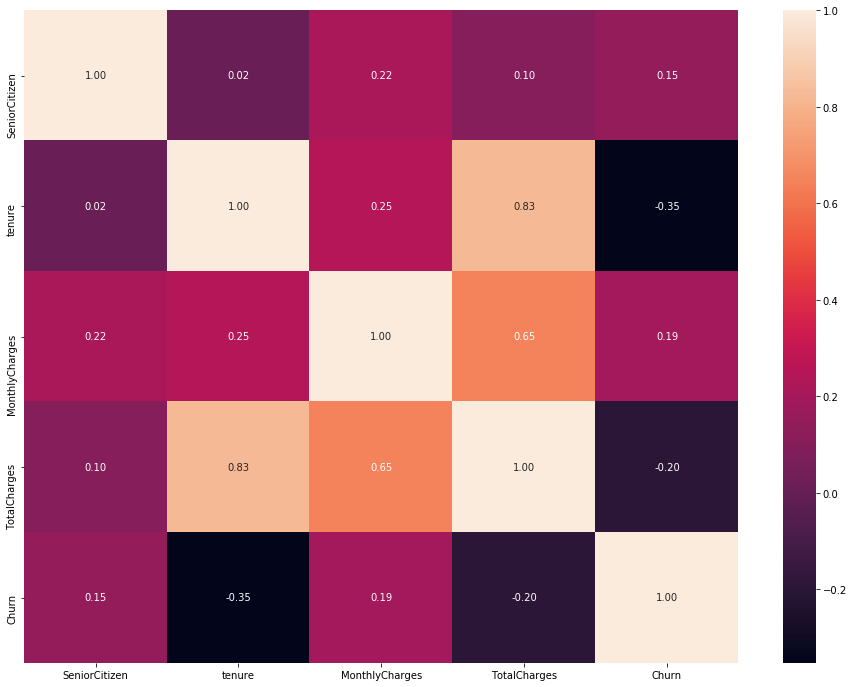

In [42]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,fmt=".2f")

More details about the Kaplan-Meier graphs given below- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3059453/

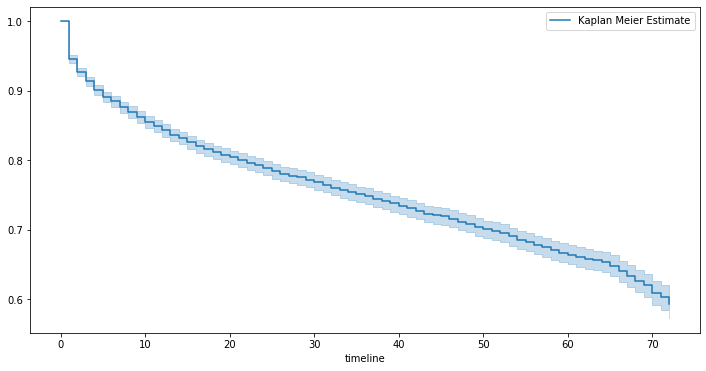

In [43]:
## Lets create an overall KaplanMeier curve, without breaking it into groups of covariates.

## Import the library
from lifelines import KaplanMeierFitter


durations = df['tenure'] ## Time to event data of censored and event data
event_observed = df['Churn']  ## It has the churned (1) and censored is (0)

## create a kmf object as km
km = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the data into the model
km.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
km.plot()

## Lets create Kaplan Meier Curves for Cohorts

Lets create three cohorts of customers based on whether a customer has subscribed for Streaming TV or not. We want to know that which cohort has the better customer retention.

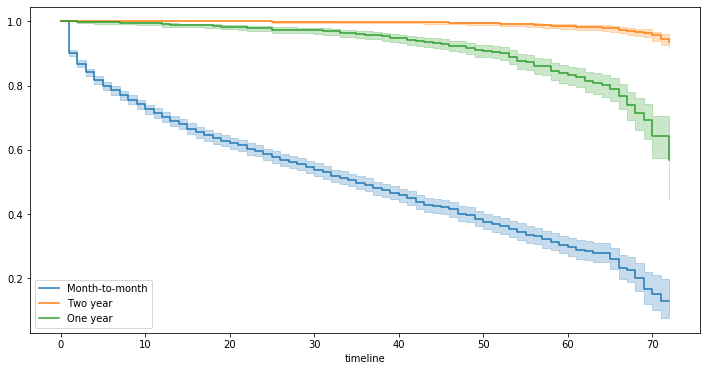

In [44]:
kmf = KaplanMeierFitter() 


T = df['tenure']     ## time to event
E = df['Churn']      ## event occurred or censored


groups = df['Contract']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 'Month-to-month')   ## Cohort 1
ix2 = (groups == 'Two year')         ## Cohort 2
ix3 = (groups == 'One year')         ## Cohort 3


kmf.fit(T[ix1], E[ix1], label='Month-to-month')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='Two year')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)


kmf.fit(T[ix3], E[ix3], label='One year')        ## fit the cohort 3 data
kmf.plot(ax=ax1)                                 ## Plot the KM curve for three cohort on same x and y axis

We see that month-to-month subscribers has highest probability to churn 

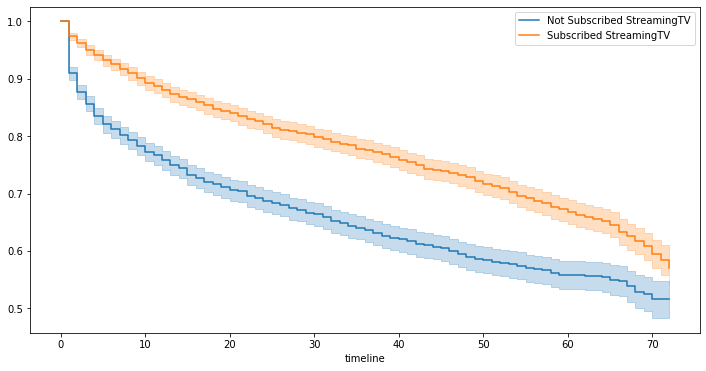

In [45]:
kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

## Two Cohorts are compared. 1. Streaming TV Not Subsribed by Users, 2. Streaming TV subscribed by the users.
groups = df['StreamingTV']   
i1 = (groups == 'No')      ## group i1 , having the pandas series for the 1st cohort
i2 = (groups == 'Yes')     ## group i2 , having the pandas series for the 2nd cohort


## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='Not Subscribed StreamingTV')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='Subscribed StreamingTV')
kmf1.plot(ax=a1)

From the curves, it is evident that the customers, who have subscribed for the Streaming TV, have better customer retention as compared to the customers, who have not subscribed for the Streaming TV. 

 we can see that the survival probability of the cohort in blue is less than the cohort in red. For the cohort in blue, the survival probability is decreasing with high rate in first 10 months and it gets relatively better after that; however, for the red cohort, the rate of decrease in survival rate is fairly constant. Therefore, for the cohort , which has not subscribed for the Streaming TV, efforts should be made to retain the customers in first 10 volatile months.

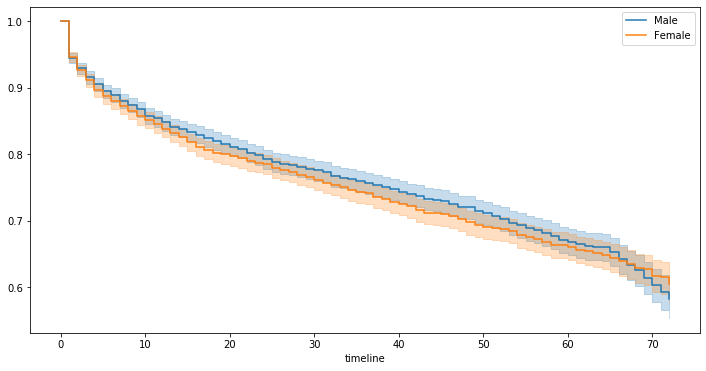

In [48]:
kmf2 = KaplanMeierFitter() ## instantiate the class to create an object


groups = df['gender']   
j1 = (groups == 'Male')      ## group i1 , having the pandas series for the 1st cohort
j2 = (groups == 'Female')     ## group i2 , having the pandas series for the 2nd cohort


## fit the model for 1st cohort
kmf2.fit(T[j1], E[j1], label='Male')
a1 = kmf2.plot()

## fit the model for 2nd cohort
kmf2.fit(T[j2], E[j2], label='Female')
kmf2.plot(ax=a1)

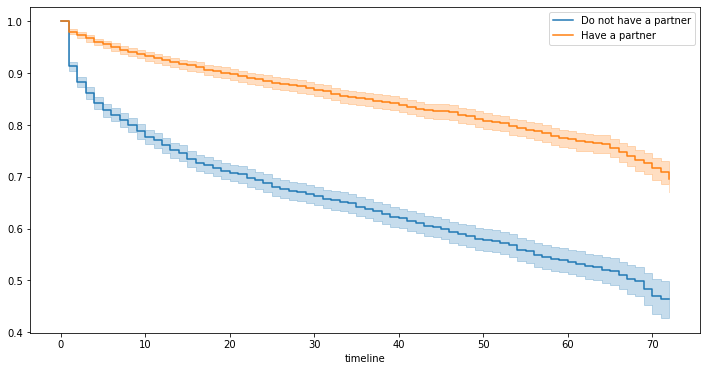

In [50]:
kmf3 = KaplanMeierFitter() ## instantiate the class to create an object


groups = df['Partner']   
k1 = (groups == 'No')      ## group i1 , having the pandas series for the 1st cohort
k2 = (groups == 'Yes')     ## group i2 , having the pandas series for the 2nd cohort


## fit the model for 1st cohort
kmf3.fit(T[k1], E[k1], label='Do not have a partner')
a1 = kmf3.plot()

## fit the model for 2nd cohort
kmf3.fit(T[k2], E[k2], label='Have a partner')
kmf3.plot(ax=a1)

Additionally, Kaplan-Meier curves  are useful only when the predictor variable is categorical (e.g.: treatment A vs treatment B; males vs females). They don’t work easily for quantitative predictors such as gene expression, weight, or age.

An alternative method is the Cox proportional hazards regression analysis, which works for both quantitative predictor variables and for categorical variables. Furthermore, the Cox regression model extends survival analysis methods to assess simultaneously the effect of several risk factors on survival time.

## Cox Proportional Hazard Model (Survival Regression)

In [15]:
from lifelines import CoxPHFitter     

In [16]:
## My objective here is to introduce you to the implementation of the model.Thus taking subset of the columns to train the model.
## Only using the subset of the columns present in the original data
df_r= df.loc[:,['tenure','Churn','gender','Partner','Dependents','PhoneService','MonthlyCharges','SeniorCitizen','StreamingTV']]
df_r.head() ## have a look at the data 

,tenure,Churn,gender,Partner,Dependents,PhoneService,MonthlyCharges,SeniorCitizen,StreamingTV
0,1,0,Female,Yes,No,No,29.85,0,No
1,34,0,Male,No,No,Yes,56.95,0,No
2,2,1,Male,No,No,Yes,53.85,0,No
3,45,0,Male,No,No,No,42.30,0,No
4,2,1,Female,No,No,Yes,70.70,0,No


In [17]:
## Create dummy variables by using one-hot encoding
df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()

,tenure,Churn,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,29.85,0,0,1,0,0,0,0
1,34,0,56.95,0,1,0,0,1,0,0
2,2,1,53.85,0,1,0,0,1,0,0
3,45,0,42.30,0,1,0,0,0,0,0
4,2,1,70.70,0,0,0,0,1,0,0


In this seminal paper, Cox (1972) presented the proportional hazards model, which specifies that the conditional hazard function of failure time given a set of covariates is the product of an unknown baseline hazard function and an exponential regression function of covariates

Description of the above model -https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html#cox-s-proportional-hazard-model

In [22]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_dummy, 'tenure', event_col='Churn')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

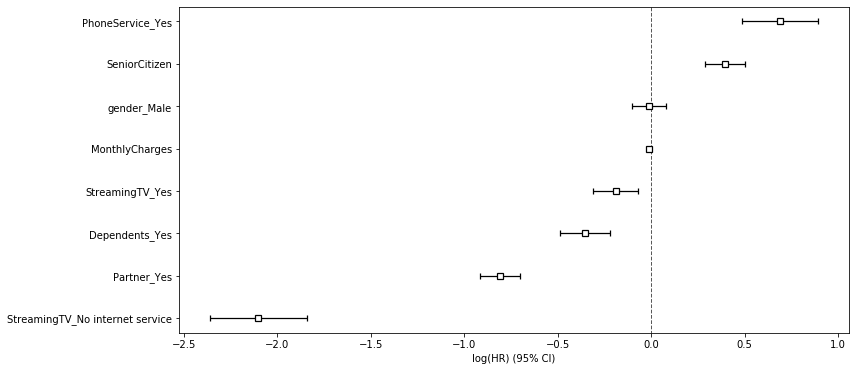

In [23]:
cph.plot() #With a fitted model, an alternative way to view the coefficients and their ranges is to use the plot method.

This plot is an another way to show the coefficient for example- PhoneService_Yes(having a phone service)-has a coefficient of about 0.69 Thus, a one unit increase in PhoneService_Yes means the the baseline hazard will increase by a factor of exp(0.69)= 2.00, about a 20% increase in the Cox proportional hazard model, a higher hazard means more at risk of the event occurring. The value exp(0.69) is called the hazard ratio

Interesting point to note here is that , the β (coef ) values in case of covariates MonthlyCharges and gender_Male is approximately zero (~-0.01), but still the MonthlyCharges plays a significant role in predicting churn , while the latter is insignificant. The reason is that the MonthlyCharges is continuous value and it can vary from the order of tens, hundreds to thousands, when multiplied by the small coef (β=-0.01), it becomes significant. On the other hand, the covariate gender can only take the value 0 or 1, and in both the cases [exp(-0.01 * 0), exp(-0.01*1)] it will be insignificant.

In [24]:
## We want to see the Survival curve at the customer level. Therefore, we have selected 6 customers (rows 5 till 9).

tr_rows = df_dummy.iloc[1:5, 2:]
tr_rows

,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
1,56.95,0,1,0,0,1,0,0
2,53.85,0,1,0,0,1,0,0
3,42.30,0,1,0,0,0,0,0
4,70.70,0,0,0,0,1,0,0


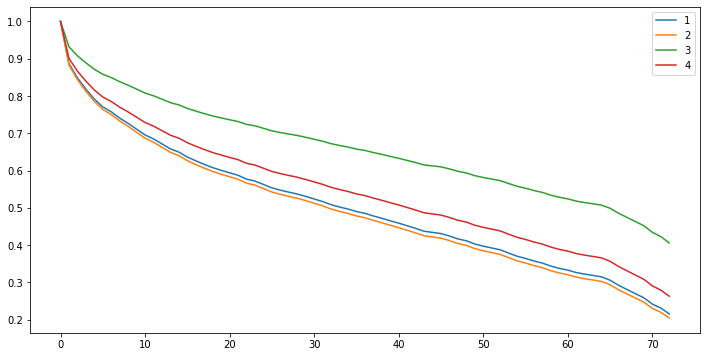

In [25]:
## Lets predict the survival curve for the selected customers. 
## Customers can be identified with the help of the number mentioned against each curve.
cph.predict_survival_function(tr_rows).plot()

So from the above graph from the given graph we can see that customer 2 has the highest probability to churn.

Creating the survival curves at each customer level helps us in proactively creating a tailor made strategy for high-valued customers for different survival risk segments along the timeline.

# Additional Resources

Lifelines Python Doumentation-https://lifelines.readthedocs.io/en/latest/Quickstart.html

SciPy 2015 lecture by Allen Downey- https://www.youtube.com/watch?v=XHYFNraQEEo

Princeton University Lectures notes-https://data.princeton.edu/wws509/notes/c7.pdf

Thanks for checking out the analysis<br>
-Akshat Anand